In [1]:
from docx import Document
import os

In [2]:
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [3]:
from bertopic import BERTopic
import numpy as np
from time import sleep
import pickle
import os
import gensim
from nltk.stem import WordNetLemmatizer

In [4]:
def get_ques_list(folder):
    os.chdir(folder)
    list_of_files = os.listdir()
    all_ques = {}
    for filename in list_of_files:
        if(filename[len(filename)-5:] == '.docx'):
            doc = Document(filename)
            # print(filename)
            # print(doc)

            fullText = []
            for para in doc.paragraphs:
                # print(para.text)
                fullText.append(para.text)
            # doctxt =  '\n'.join(fullText)
            doctxt = fullText
            fullText = []
            for eachl in doctxt:
                # print(eachl)
                if len(eachl) == 0:
                    continue
                elif eachl[0] == 'Q':
                    fullText.append(eachl.split(" ", 1)[1])   # for networking "." -> " "
                else:
                    fullText[len(fullText)-1] = fullText[len(fullText)-1] + ' ' + eachl

            all_ques[filename[:len(filename)-5]] = fullText
            # all_ques = all_ques + fullText
            # print(doctxt)
            # print(fullText)
    os.chdir("..")
    return all_ques

In [5]:
def ls(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

# Tokenize and lemmatize
def pp(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 1:         # for networking > 1
            result.append(ls(token))
    result = ' '.join(result)
    return result

In [13]:
def check_for(folder):
    ques_list_per_company = get_ques_list(folder)
    os.chdir(folder)
    print(os.getcwd(), '\n Now importing model\n')

    model = BERTopic.load('model_corr_ngram_no_len')     # default stored using 'model_cpu'

    for key, value in ques_list_per_company.items():
        print("For company : ", key)
        ques_list = value
        for ques in ques_list:
            print("Before prepro : ", ques)
            # for predicting the topics for any new sentence
            new_check = pp(ques)
#             new_check = ques
            print("After prepro : ", new_check)

            #  Find topics
            num_of_topics = 3
            similar_topics, similarity = model.find_topics(new_check, top_n=num_of_topics)

            print(
                f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity, 2)}')

            # for printing those 3 topics
            for index, top in enumerate(similar_topics):
                keys = [t[0] for t in model.get_topic(top)]
                print(f'{keys} : with probability \n{np.round(similarity, 2)[index]}')

            print()
            sleep(1)
    print()
    print()

    os.chdir('..')

In [7]:
os.chdir("theory")


In [14]:
print(os.getcwd())           # model : model_cpu_no_len  ,  preprocessing : no len
check_for("Networking")

C:\Users\KRG\Desktop\github_repo_placement\placement_analysis\theory
C:\Users\KRG\Desktop\github_repo_placement\placement_analysis\theory\Networking 
 Now importing model

For company :  Amazon
Before prepro :  What do you mean by network topology?
After prepro :  mean network topology
The top 3 similar topics are [96, 223, 44], and the similarities are [0.56 0.52 0.5 ]
['network network', 'network', 'network network network', 'ee network', 'ee', 'network ee', 'network ee network', 'network use', 'use network', 'network network particular'] : with probability 
0.56
['subnet', 'subnets', 'connected kbps', 'subnet host', 'router communication line', 'router communication', 'split', 'mean network', 'communication line', 'usage'] : with probability 
0.52
['network urity', 'urity', 'urity network', 'urity network urity', 'network urity network', 'network', 'ure', 'ter', 'ter network urity', 'making network ure'] : with probability 
0.5

Before prepro :  What are the advantages of Distribute

Before prepro :  is the purpose of a computer network, and how does it facilitate communication between devices?
After prepro :  purpose network facilitate communication devices
The top 3 similar topics are [96, 223, 23], and the similarities are [0.59 0.54 0.51]
['network network', 'network', 'network network network', 'ee network', 'ee', 'network ee', 'network ee network', 'network use', 'use network', 'network network particular'] : with probability 
0.59
['subnet', 'subnets', 'connected kbps', 'subnet host', 'router communication line', 'router communication', 'split', 'mean network', 'communication line', 'usage'] : with probability 
0.54
['network layer network', 'layer network', 'layer network layer', 'network layer', 'layer', 'network', 'network network', 'network network layer', 'interface layer', 'layer internet'] : with probability 
0.51

Before prepro :  you explain the key differences between a local area network (LAN) and a wide area network (WAN)?
After prepro :  explain

Before prepro :  the TCP/IP protocol suite, its key protocols, and their respective functions in network communication.
After prepro :  tcp ip protocol suite key protocols respective function network communication
The top 3 similar topics are [14, 68, 64], and the similarities are [0.52 0.52 0.51]
['protocol', 'protocol protocol', 'new protocol', 'way protocol', 'strategy protocol', 'strategy', 'complex protocol', 'protocol fail', 'problem protocol', 'use protocol'] : with probability 
0.52
['tcp', 'socket', 'tcp implementation', 'tcp ip', 'sctp', 'transport', 'implementation', 'tcp us', 'berkeley', 'stream control transmission'] : with probability 
0.52
['udp', 'tcp udp', 'protocol udp', 'tcp', 'udp tcp', 'rpc', 'transport', 'transport protocol', 'transport protocol udp', 'protocol'] : with probability 
0.51

Before prepro :  is the purpose of a firewall in a computer network, and how does it enhance network security?
After prepro :  purpose firewall network enhance network security
T

Before prepro :  is the purpose of the Address Resolution Protocol (ARP), and how does it map IP addresses to MAC addresses?
After prepro :  purpose address resolution protocol arp map ip address mac address
The top 3 similar topics are [83, 231, 56], and the similarities are [0.59 0.46 0.43]
['arp', 'dhcp', 'ethernet address', 'arp cache', 'arp broadcast', 'address', 'dhcp server', 'host', 'ip address', 'broadcast'] : with probability 
0.59
['ethernet address', 'address', 'ethernet', 'ip address', 'nics', 'address host', 'fig ip address', 'ip', 'address ethernet', 'ethernet address host'] : with probability 
0.46
['ip address', 'ip', 'address', 'address ip', 'ip address ip', 'address ip address', 'ip ip', 'ip ip host', 'net ip', 'address assignment'] : with probability 
0.43

Before prepro :  and describe a network packet, including its structure and the information it carries.
After prepro :  network packet include structure information carry
The top 3 similar topics are [51, 124, 62

Before prepro :  what a denial-of-service (DoS) attack is, including its objectives, methods, and potential impact on a network.
After prepro :  denial service do attack include objectives methods potential impact network
The top 3 similar topics are [217, 218, 64], and the similarities are [0.34 0.32 0.32]
['stack', 'protocol stack', 'stack protocol', 'protocol stack protocol', 'stack protocol stack', 'architecture protocol stack', 'architecture protocol', 'protocol', 'protocol stack architecture', 'stack architecture protocol'] : with probability 
0.34
['network performance', 'measurement', 'performance', 'network measurement', 'measure network performance', 'measurement network', 'network performance measurement', 'performance measurement', 'measure network', 'measuring'] : with probability 
0.32
['udp', 'tcp udp', 'protocol udp', 'tcp', 'udp tcp', 'rpc', 'transport', 'transport protocol', 'transport protocol udp', 'protocol'] : with probability 
0.32

Before prepro :  on the concep

Before prepro :  networks are prevalent in modern environments. Can you explain how a wireless network operates and discuss the key considerations for ensuring its security?
After prepro :  network prevalent modern environments explain wireless network operate discuss key considerations ensure security
The top 3 similar topics are [144, 96, 177], and the similarities are [0.52 0.5  0.47]
['wireless', 'wireless network', 'wireless network wireless', 'network wireless', 'wireless network example', 'wired wireless', 'wireless communication', 'network example', 'wired', 'wifi'] : with probability 
0.52
['network network', 'network', 'network network network', 'ee network', 'ee', 'network ee', 'network ee network', 'network use', 'use network', 'network network particular'] : with probability 
0.5
['wireless lan', 'lan', 'wireless', 'lan wireless', 'wired lan', 'ieee wireless', 'lan wireless lan', 'wireless lan wireless', 'computer communicate', 'ieee'] : with probability 
0.47

Before prep

Before prepro :  segmentation enhances security and performance. Can you discuss the benefits of network segmentation and the methodologies used to implement it?
After prepro :  segmentation enhance security performance discuss benefit network segmentation methodologies implement
The top 3 similar topics are [96, 223, 102], and the similarities are [0.38 0.32 0.32]
['network network', 'network', 'network network network', 'ee network', 'ee', 'network ee', 'network ee network', 'network use', 'use network', 'network network particular'] : with probability 
0.38
['subnet', 'subnets', 'connected kbps', 'subnet host', 'router communication line', 'router communication', 'split', 'mean network', 'communication line', 'usage'] : with probability 
0.32
['segment', 'retransmit', 'lost segment', 'segment outstanding', 'retransmit segment', 'segment lost', 'acknowledge', 'lost', 'acknowledged segment', 'retransmit state'] : with probability 
0.32

Before prepro :  Networking (SDN) is an emerging

Before prepro :  NAT and its use in network configurations.
After prepro :  nat use network configurations
The top 3 similar topics are [120, 96, 183], and the similarities are [0.53 0.42 0.4 ]
['nat', 'nat box', 'box', 'address', 'translation', 'address translation', 'problem nat', 'ip', 'ip address', 'outgoing packet'] : with probability 
0.53
['network network', 'network', 'network network network', 'ee network', 'ee', 'network ee', 'network ee network', 'network use', 'use network', 'network network particular'] : with probability 
0.42
['vpn', 'private network', 'virtual private', 'virtual private network', 'private', 'vpns', 'virtual', 'us vpn', 'vpns virtual private', 'vpns virtual'] : with probability 
0.4

Before prepro :  the concept of Quality of Service (QoS) in networking and its importance in ensuring the reliable and efficient transmission of data, including prioritizing specific types of traffic, managing network congestion, and guaranteeing bandwidth for critical appli

Before prepro :  the purpose of DHCP (Dynamic Host Configuration Protocol) in network environments, including its role in automatically assigning IP addresses, subnet masks, default gateways, and other network configuration parameters to network devices to simplify network administration.
After prepro :  purpose dhcp dynamic host configuration protocol network environments include role automatically assign ip address subnet mask default gateways network configuration parameters network devices simplify network administration
The top 3 similar topics are [83, 223, 231], and the similarities are [0.45 0.36 0.36]
['arp', 'dhcp', 'ethernet address', 'arp cache', 'arp broadcast', 'address', 'dhcp server', 'host', 'ip address', 'broadcast'] : with probability 
0.45
['subnet', 'subnets', 'connected kbps', 'subnet host', 'router communication line', 'router communication', 'split', 'mean network', 'communication line', 'usage'] : with probability 
0.36
['ethernet address', 'address', 'ethernet

Before prepro :  (Transmission Control Protocol) and UDP (User Datagram Protocol) are two prominent transport layer protocols. Can you compare and contrast TCP and UDP in terms of their features and use cases?
After prepro :  transmission control protocol udp user datagram protocol prominent transport layer protocols compare contrast tcp udp term feature use case
The top 3 similar topics are [64, 68, 14], and the similarities are [0.71 0.57 0.5 ]
['udp', 'tcp udp', 'protocol udp', 'tcp', 'udp tcp', 'rpc', 'transport', 'transport protocol', 'transport protocol udp', 'protocol'] : with probability 
0.71
['tcp', 'socket', 'tcp implementation', 'tcp ip', 'sctp', 'transport', 'implementation', 'tcp us', 'berkeley', 'stream control transmission'] : with probability 
0.57
['protocol', 'protocol protocol', 'new protocol', 'way protocol', 'strategy protocol', 'strategy', 'complex protocol', 'protocol fail', 'problem protocol', 'use protocol'] : with probability 
0.5

Before prepro :  enable com

Before prepro :  What is DNS (Domain Name System) and how does it work?
After prepro :  dns domain work
The top 3 similar topics are [5, 269, 56], and the similarities are [0.7  0.41 0.31]
['dns', 'domain', 'record', 'dns server', 'zone', 'resource record', 'server', 'edu', 'name', 'record type'] : with probability 
0.7
['interdomain', 'intradomain', 'interdomain routing', 'routing protocol', 'intradomain protocol', 'routing', 'gateway protocol', 'interdomain routing protocol', 'intradomain routing', 'protocol'] : with probability 
0.41
['ip address', 'ip', 'address', 'address ip', 'ip address ip', 'address ip address', 'ip ip', 'ip ip host', 'net ip', 'address assignment'] : with probability 
0.31

Before prepro :  What is a MAC address and how is it used in networking?
After prepro :  mac address network
The top 3 similar topics are [231, 201, 96], and the similarities are [0.62 0.54 0.52]
['ethernet address', 'address', 'ethernet', 'ip address', 'nics', 'address host', 'fig ip addre

Before prepro :  Can you explain the difference between IPv4 and IPv6 and the advantages of using IPv6?
After prepro :  explain difference ipv ipv advantage ipv
The top 3 similar topics are [100, 176, 60], and the similarities are [0.45 0.43 0.36]
['ipv', 'version ip', 'version', 'ip version', 'ip', 'deployment', 'new version', 'deployed', 'ipv ipv', 'flexible'] : with probability 
0.45
['advantage', 'strategy', 'benefit', 'advantage benefit', 'advantage scheme', 'significant', 'abbreviation', 'normal operation advantage', 'numerous advantage biggest', 'numerous advantage'] : with probability 
0.43
['header', 'ip header', 'ipv', 'ipv header', 'field', 'header field', 'header ip', 'ip', 'header ipv', 'header ip header'] : with probability 
0.36

Before prepro :  is an important concept in network management. Can you explain what subnetting is and how it helps in organizing and optimizing network resources?
After prepro :  important concept network management explain subnetting help orga

Before prepro :  you discuss the differences between physical addresses (MAC addresses) and logical addresses (IP addresses)? How do they function in network communication?
After prepro :  discuss differences physical address mac address logical address ip address function network communication
The top 3 similar topics are [231, 56, 83], and the similarities are [0.48 0.42 0.38]
['ethernet address', 'address', 'ethernet', 'ip address', 'nics', 'address host', 'fig ip address', 'ip', 'address ethernet', 'ethernet address host'] : with probability 
0.48
['ip address', 'ip', 'address', 'address ip', 'ip address ip', 'address ip address', 'ip ip', 'ip ip host', 'net ip', 'address assignment'] : with probability 
0.42
['arp', 'dhcp', 'ethernet address', 'arp cache', 'arp broadcast', 'address', 'dhcp server', 'host', 'ip address', 'broadcast'] : with probability 
0.38

Before prepro :  protocols govern the rules and formats for communication. Can you provide examples of commonly used network

Before prepro :  TCP/IP protocol suite.
After prepro :  tcp ip protocol suite
The top 3 similar topics are [68, 64, 14], and the similarities are [0.68 0.62 0.57]
['tcp', 'socket', 'tcp implementation', 'tcp ip', 'sctp', 'transport', 'implementation', 'tcp us', 'berkeley', 'stream control transmission'] : with probability 
0.68
['udp', 'tcp udp', 'protocol udp', 'tcp', 'udp tcp', 'rpc', 'transport', 'transport protocol', 'transport protocol udp', 'protocol'] : with probability 
0.62
['protocol', 'protocol protocol', 'new protocol', 'way protocol', 'strategy protocol', 'strategy', 'complex protocol', 'protocol fail', 'problem protocol', 'use protocol'] : with probability 
0.57

Before prepro :  is a socket?
After prepro :  socket
The top 3 similar topics are [68, 46, 197], and the similarities are [0.69 0.6  0.53]
['tcp', 'socket', 'tcp implementation', 'tcp ip', 'sctp', 'transport', 'implementation', 'tcp us', 'berkeley', 'stream control transmission'] : with probability 
0.69
['port',

Before prepro :  the concept of subnetting in IP addressing and how it enables the division of a large network into smaller subnetworks, enhancing network efficiency and scalability.
After prepro :  concept subnetting ip address enable division large network smaller subnetworks enhance network efficiency scalability
The top 3 similar topics are [223, 96, 23], and the similarities are [0.58 0.48 0.44]
['subnet', 'subnets', 'connected kbps', 'subnet host', 'router communication line', 'router communication', 'split', 'mean network', 'communication line', 'usage'] : with probability 
0.58
['network network', 'network', 'network network network', 'ee network', 'ee', 'network ee', 'network ee network', 'network use', 'use network', 'network network particular'] : with probability 
0.48
['network layer network', 'layer network', 'layer network layer', 'network layer', 'layer', 'network', 'network network', 'network network layer', 'interface layer', 'layer internet'] : with probability 
0.44

In [9]:
def get_topic(folder):
    ques_list_per_company = get_ques_list(folder)
    os.chdir(folder)
    print(os.getcwd(), '\n Now importing model\n')

    model = BERTopic.load('model_ngram_no_len')     # default stored using 'model_cpu'
    
    all_topics_per_company = {}
    for key, value in ques_list_per_company.items():
        print("For company : ", key)
        ques_list = value
        one_company_topics = []
        for ques in ques_list:
            # for predicting the topics for any new sentence
            new_check = pp(ques)           # after preprocessing

            #  Find topics
            num_of_topics = 2
            similar_topics, similarity = model.find_topics(new_check, top_n=num_of_topics)
            for topic in similar_topics:
                one_company_topics.append(topic)
        all_topics_per_company[key] = one_company_topics
            
    os.chdir('..')
    return all_topics_per_company

In [10]:
print(os.getcwd())           # model : model_cpu_len_gt_2  ,  preprocessing : len > 2
list_of_topics_per_company = get_topic("Networking")
list_of_topics_per_company

C:\Users\hp\PycharmProjects\placement\theory
C:\Users\hp\PycharmProjects\placement\theory\Networking 
 Now importing model

For company :  Amazon
For company :  Google
For company :  Microsoft


{'Amazon': [87,
  44,
  176,
  200,
  234,
  87,
  234,
  297,
  234,
  87,
  185,
  197,
  68,
  107,
  168,
  43,
  118,
  107,
  128,
  20,
  76,
  67],
 'Google': [87,
  44,
  283,
  67,
  320,
  140,
  15,
  254,
  20,
  330,
  110,
  158,
  168,
  329,
  169,
  15,
  92,
  186],
 'Microsoft': [145,
  65,
  1,
  279,
  330,
  197,
  20,
  170,
  146,
  107,
  53,
  283,
  118,
  170,
  97,
  279,
  210,
  186,
  73,
  283,
  107,
  29,
  73,
  15,
  95,
  176,
  174,
  220]}

In [12]:
os.chdir('Networking')
model = BERTopic.load('model_ngram_no_len')
os.chdir('..')

In [13]:
acronym = {}
tp = model.get_topic_info()
for i in range(len(tp['Topic'])):
    print(tp['Topic'].iloc[i], '  :  ', tp['Count'].iloc[i], "  :  ", tp['Name'].iloc[i])
    acronym[tp['Topic'].iloc[i]] = tp['Name'].iloc[i].split(str(tp['Topic'].iloc[i])+'_')[1].split('_')[0] + '_' + str(tp['Topic'].iloc[i])


-1   :   9117   :   -1_bit_time_packet_network
0   :   609   :   0_telephone_mobile_phone_voice
1   :   248   :   1_dns_domain_record_query
2   :   199   :   2_web_site_internet_web site
3   :   189   :   3_band_frequency_spectrum_ghz
4   :   185   :   4_frame_acknowledgement_sender_acknowledgement frame
5   :   180   :   5_alice_bob_ra_session
6   :   177   :   6_browser_page_plug_web page
7   :   176   :   7_collision_slot_station_probability
8   :   172   :   8_connection_syn_way handshake_fin
9   :   137   :   9_satellite_orbit_earth_communication satellite
10   :   134   :   10_html_xml_style_tag
11   :   129   :   11_service_transport service_transport_connectionless
12   :   126   :   12_rfid_tag_reader_rfid tag
13   :   120   :   13_cipher_ciphertext_block_plaintext
14   :   116   :   14_cache_caching_proxy_cached
15   :   114   :   15_protocol_protocol protocol_use protocol_new protocol
16   :   97   :   16_adsl_modem_dsl_cable
17   :   93   :   17_agent_user agent_transfer ag

In [14]:
for key,value in acronym.items():
    print(key, " : ", value)

-1  :  bit_-1
0  :  telephone_0
1  :  dns_1
2  :  web_2
3  :  band_3
4  :  frame_4
5  :  alice_5
6  :  browser_6
7  :  collision_7
8  :  connection_8
9  :  satellite_9
10  :  html_10
11  :  service_11
12  :  rfid_12
13  :  cipher_13
14  :  cache_14
15  :  protocol_15
16  :  adsl_16
17  :  agent_17
18  :  duplicate_18
19  :  urity_19
20  :  ip address_20
21  :  multicast_21
22  :  mbps_22
23  :  fiber_23
24  :  window_24
25  :  network layer network_25
26  :  congestion_26
27  :  isp_27
28  :  node_28
29  :  port_29
30  :  peer_30
31  :  bucket_31
32  :  prefix_32
33  :  twisted_33
34  :  ethernet_34
35  :  cdn_35
36  :  bluetooth_36
37  :  mobile host_37
38  :  routing_38
39  :  header_39
40  :  fragment_40
41  :  detail_41
42  :  mpeg_42
43  :  application layer_43
44  :  network urity_44
45  :  frame_45
46  :  base station_46
47  :  lan_47
48  :  mime_48
49  :  byte_49
50  :  fig example_50
51  :  rfc_51
52  :  station_52
53  :  packet_53
54  :  delay_54
55  :  transport layer_55
56 

In [15]:
topic_len = len(model.get_topic_info())
print(topic_len)

333


In [16]:
for i in range(1, topic_len+1):
    print(i-1," : ",model.get_topic(i-1))

0  :  [('telephone', 0.021390241940931535), ('mobile', 0.019029234225563737), ('phone', 0.016994853152059404), ('voice', 0.014968803092413174), ('mobile phone', 0.014319412451286193), ('office', 0.008587403054238526), ('telephone network', 0.00771726293100674), ('call', 0.00763186748589364), ('company', 0.006718415514123162), ('voice ip', 0.00664230327022467)]
1  :  [('dns', 0.04165507935992076), ('domain', 0.04061758170376903), ('record', 0.019629447668915913), ('query', 0.016904133331047122), ('server', 0.015127941028496966), ('dns server', 0.011657016642200002), ('name', 0.011040917943273262), ('edu', 0.011029282984229392), ('zone', 0.010658574653727874), ('resource record', 0.008823426387383513)]
2  :  [('web', 0.023779499937631565), ('site', 0.021170125411879064), ('internet', 0.012420948025297744), ('web site', 0.011859379278788948), ('search', 0.010403182100264714), ('world', 0.009921745853004763), ('world wide', 0.00916293660558103), ('popular', 0.008805778007960166), ('world w

In [17]:
model.visualize_barchart(top_n_topics=len(model.get_topic_info())-1, n_words=8)

In [19]:
def show_cloud(topics):
    from matplotlib import pyplot as plt
    from wordcloud import WordCloud
    import matplotlib.colors as mcolors
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                            max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                            contour_width=3,contour_color='black')

#     topics = [model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)]
    # print(topics)
    fig, axes = plt.subplots(int(len(topics)**0.5), int(len(topics)**0.5), figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i])
    #     print(topic_words)
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=8))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

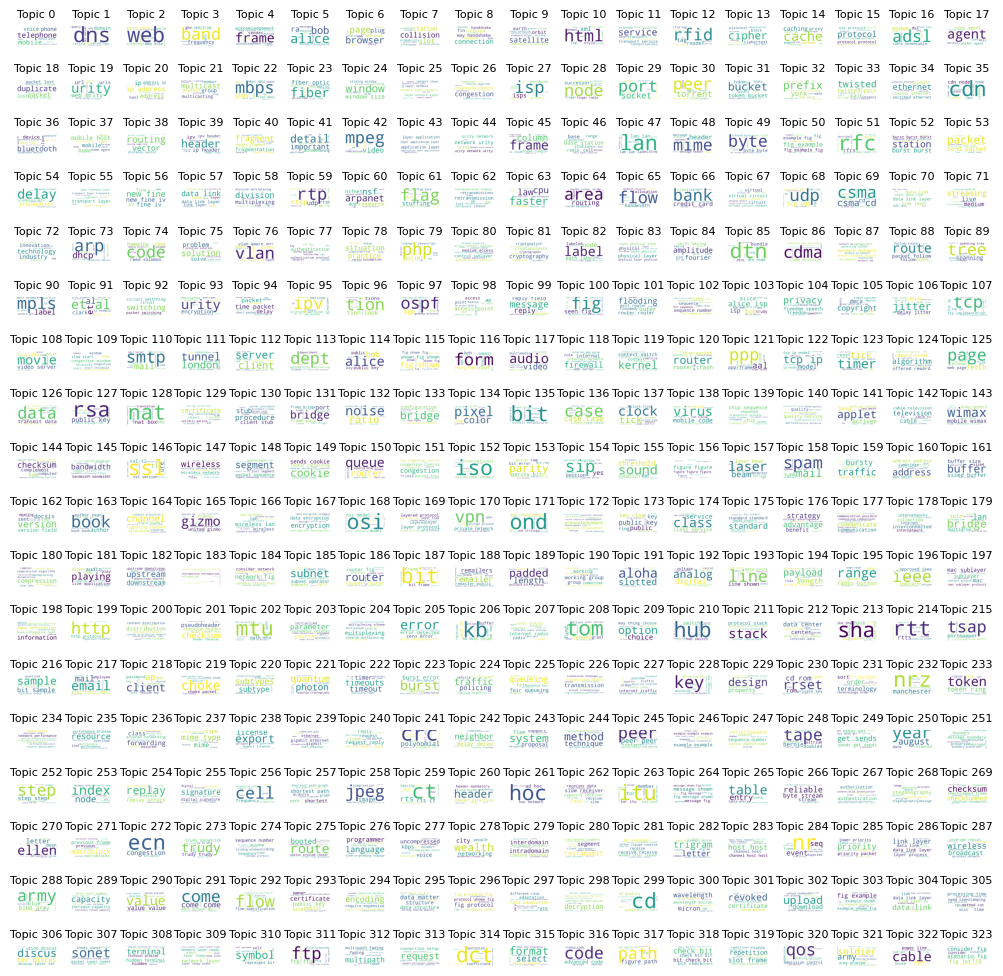

In [20]:
show_cloud([model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)])

In [21]:
from math import ceil
def show_cloud_ceil(topics, topic_numbers):
    from matplotlib import pyplot as plt
    from wordcloud import WordCloud
    import matplotlib.colors as mcolors
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                            max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                            contour_width=3,contour_color='black')

#     topics = [model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)]
    # print(topics)
    fig, axes = plt.subplots(ceil(len(topics)**0.5), ceil(len(topics)**0.5), figsize=(10,10), sharex=True, sharey=True)
    
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        if i >= len(topics):
            fig.delaxes(ax)
            continue
        topic_words = dict(topics[i])
    #     print(topic_words)
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(topic_numbers[i]), fontdict=dict(size=8))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

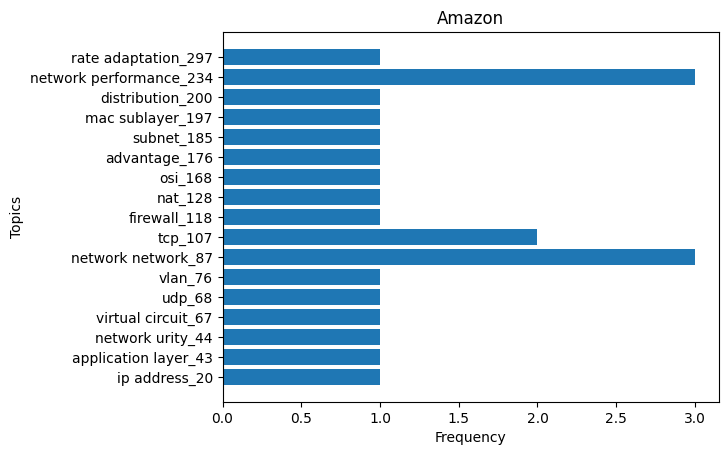

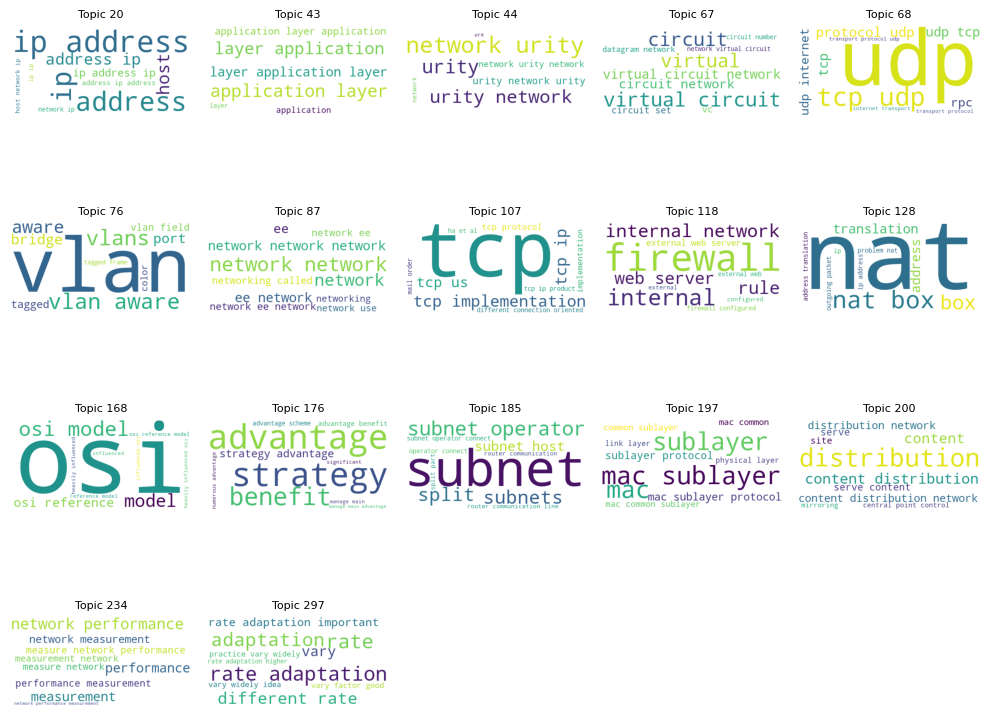

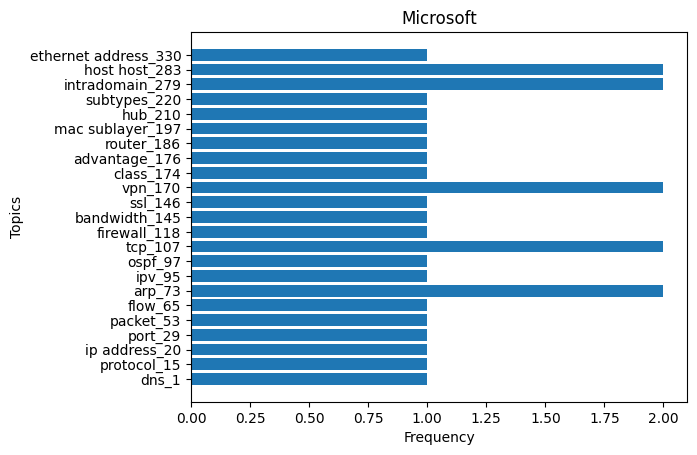

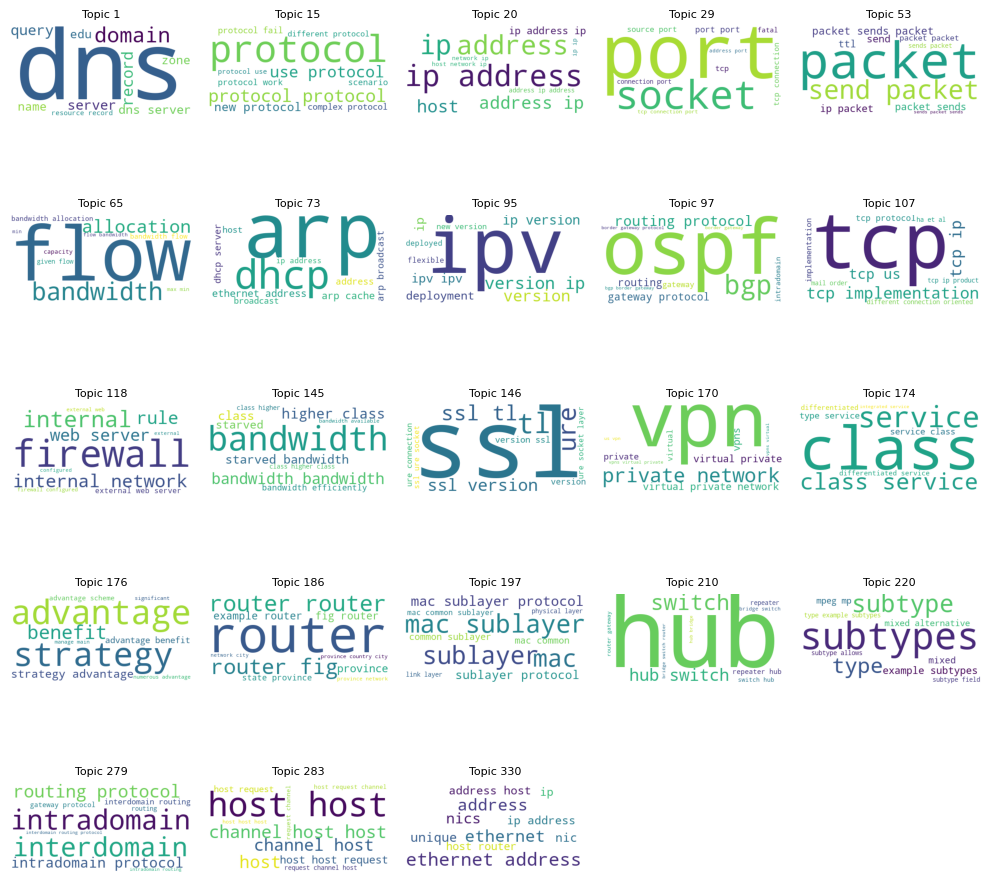

In [22]:
import matplotlib.pyplot as plt

# The given data
data = list_of_topics_per_company

# Extracting unique numbers from the data
unique_numbers = set()
for company_data in data.values():
    unique_numbers.update(set(company_data))
unique_numbers = sorted(list(unique_numbers))

# Counting frequency of each unique number for each company
company_frequencies = {}
for company_name, company_data in data.items():
    company_frequencies[company_name] = {}
    for number in unique_numbers:
        if number == -1:
            continue
        company_frequencies[company_name][number] = company_data.count(number)

# Plotting bar graph for each company
for company_name, company_frequency in company_frequencies.items():
    y_values = [key for key, value in company_frequency.items() if value > 0]
    for_cloud = [model.get_topic(topic_number) for topic_number in y_values]
    topic_numbers = [topic_number for topic_number in y_values]
    x_values = [company_frequency[key] for key in y_values]
    y_values = [acronym[value] for value in y_values]
    plt.barh(y_values, x_values)
    plt.title(company_name.capitalize())
    plt.xlabel('Frequency')
    plt.ylabel('Topics')
    plt.yticks(y_values)
    plt.show()
    show_cloud_ceil(for_cloud, topic_numbers)
